# 1 - Data Exploration

## 1-a Read Data and Make DataFrame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing as pp
from sklearn.metrics import r2_score
import sklearn.metrics as met
import statsmodels.api as sm
import warnings

warnings.filterwarnings(action="ignore")


df = pd.read_csv("./OnlineNewsPopularityDataset.csv")

X = df.drop(['url', ' timedelta', ' shares'], 1)
y = df[' shares']

## 1-b Descriptive Statictics of All Features 

In [2]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


## 1-c Features Correlation

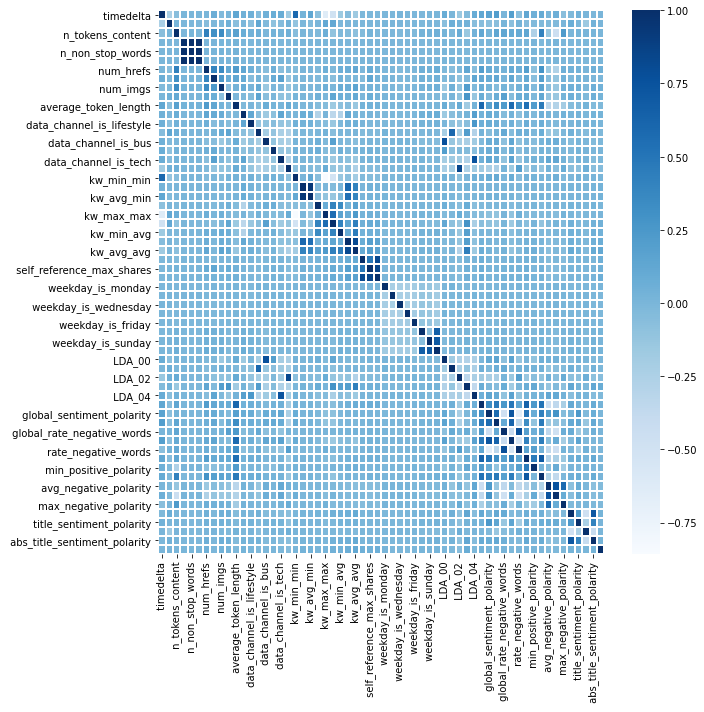

In [3]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=False, linewidths=1.0, cmap='Blues')

# 2 - Building a Regression Model

## 2-a Features preprocessing

### Log scale share value 
Standard deviation of shares value is too large. 
Therefore, convert it into log scale.

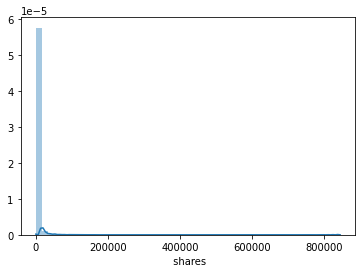

In [4]:
sns.distplot(y, hist=True)

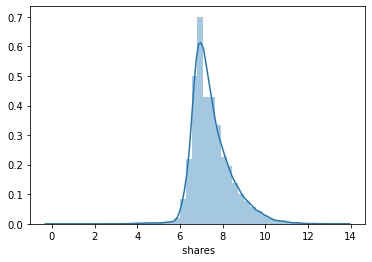

In [5]:
y = np.log(y)
sns.distplot(y, hist=True)

## 2-b Adding non-linear features predictors and interactions

In [6]:
def PolynomialFeatures_labeled(input_df,power):
    poly = pp.PolynomialFeatures(power)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_

    input_feature_names = list(input_df.columns)
    target_feature_names = ["Constant Term"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s^%d" % (variable,power)
                if final_label == "":         
                    final_label = intermediary_label
                else:
                    final_label = final_label + " x " + intermediary_label
        target_feature_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    return output_df

In [7]:
X_polynomial = PolynomialFeatures_labeled(X, 2)
X_polynomial

,Constant Term,n_tokens_title^1,n_tokens_content^1,n_unique_tokens^1,n_non_stop_words^1,n_non_stop_unique_tokens^1,num_hrefs^1,num_self_hrefs^1,num_imgs^1,num_videos^1,...,title_subjectivity^2,title_subjectivity^1 x title_sentiment_polarity^1,title_subjectivity^1 x abs_title_subjectivity^1,title_subjectivity^1 x abs_title_sentiment_polarity^1,title_sentiment_polarity^2,title_sentiment_polarity^1 x abs_title_subjectivity^1,title_sentiment_polarity^1 x abs_title_sentiment_polarity^1,abs_title_subjectivity^2,abs_title_subjectivity^1 x abs_title_sentiment_polarity^1,abs_title_sentiment_polarity^2
0,1.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.250000,-0.093750,0.000000,0.093750,0.035156,-0.000000,-0.035156,0.000000,0.000000,0.035156
1,1.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000
2,1.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000
3,1.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000
4,1.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.206612,0.061983,0.020661,0.061983,0.018595,0.006198,0.018595,0.002066,0.006198,0.018595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,1.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.010000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.000000
39640,1.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.090000,0.300000,0.060000,0.300000,1.000000,0.200000,1.000000,0.040000,0.200000,1.000000
39641,1.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.206612,0.061983,0.020661,0.061983,0.018595,0.006198,0.018595,0.002066,0.006198,0.018595
39642,1.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000


## 2-c Features selection

### Forward selection

In [ ]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_polynomial,y, test_size=0.3, random_state=10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (27750, 1770)
검증 데이터:  (11894, 1770)


In [13]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print("r_squared", met.r2_score(y_test, y_pred))
print("MSE", met.mean_squared_error(y_test, y_pred))
print("MAE", met.mean_absolute_error(y_test, y_pred))

r_squared -0.35773577052476324
MSE 1.1834345270774593
MAE 0.6450257085359725


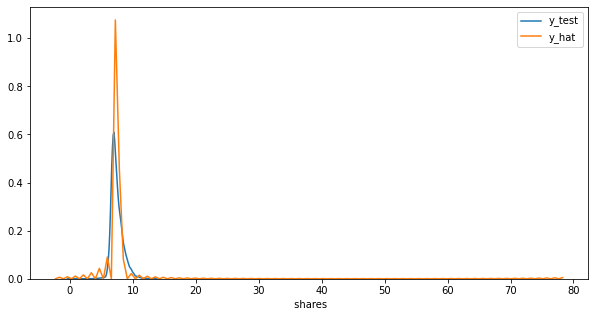

In [14]:
y_hat = lasso.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("r_squared", met.r2_score(y_test, y_pred))
print("mse", met.mean_squared_error(y_test, y_pred))
print("MAE", met.mean_absolute_error(y_test, y_pred))

r_squared -679855457965255.4
mse 592578055203759.9
MAE 223250.90932940537


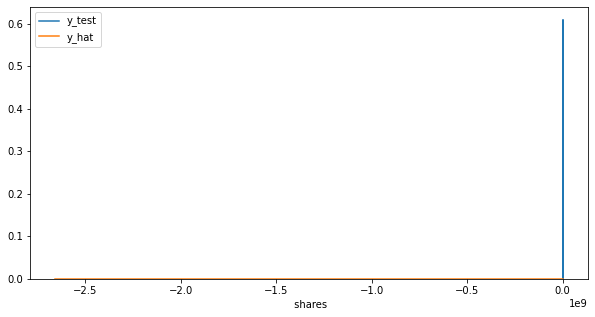

In [12]:
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

In [15]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print("r_squared", met.r2_score(y_test, y_pred))
print("mse", met.mean_squared_error(y_test, y_pred))
print("MAE", met.mean_absolute_error(y_test, y_pred))

r_squared -16647480.012874626
mse 14510337.171044534
MAE 35.57818292620904


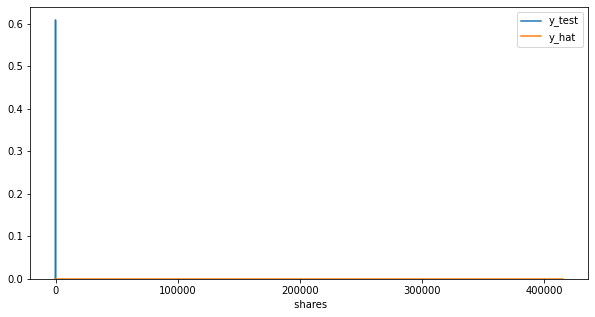

In [16]:
y_hat = ridge.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()